In [1]:
# Support Vector Machine
# Mengimpor Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Mengimpor Dataset

datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

In [3]:
#Menampilkan data dalam bentuk dictionary form

datasets.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
#Menyimpan dataset ke dalam bentuk DataFrame

df = pd.DataFrame(datasets)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
#Menampilkan statistik deskriptif dari data, perhatikan bagaimana data menyebar, nilai minimum, maksimum, rata-rata,
#simpangan baku, dan apakah data hanya berkumpul pada rentang kuartil tertentu.

df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [28]:
#Pengecekan missing data

np.sum(pd.isnull(df).sum()) # Sum of the count of null objects in all columns of data frame

0

<AxesSubplot:xlabel='Purchased', ylabel='count'>

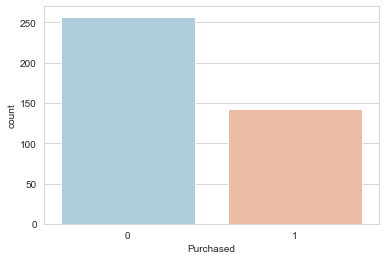

In [7]:
#Apakah data kita imbalance?

sns.set_style('whitegrid')
sns.countplot(x=df['Purchased'],data=df,palette='RdBu_r')

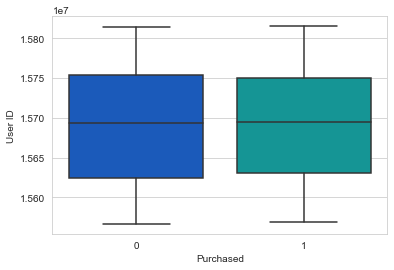

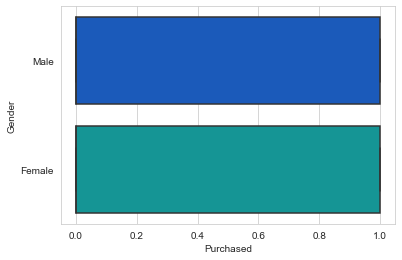

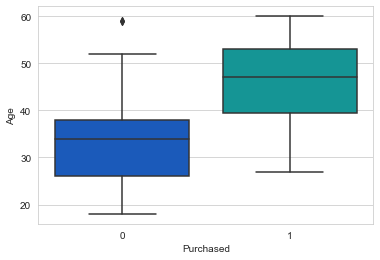

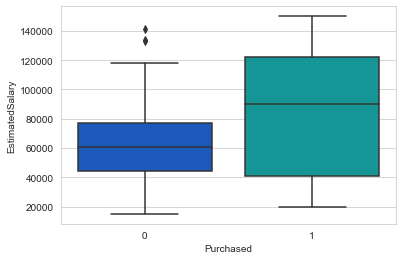

<Figure size 432x288 with 0 Axes>

In [8]:
#Pemeriksaan sebaran nilai data pada tiap atribut/variabel untuk masing-masing kelas dengan box-plot

l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Purchased',y=l[i], data=df, palette='winter')
    plt.figure()

Text(0.5, 1.0, 'Pembelian menurut nilai atribut: EstimatedSalary')

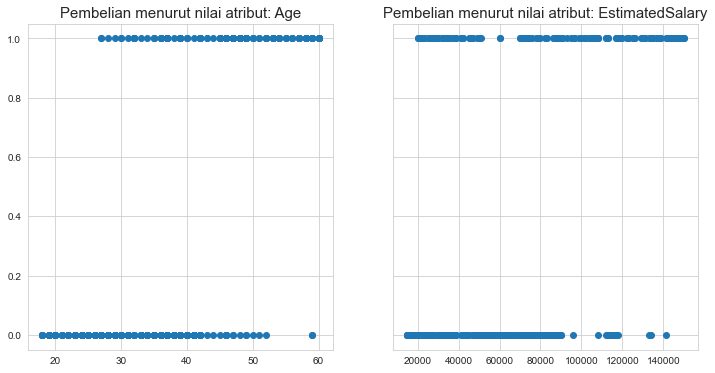

In [9]:
#Tidak semua atribut/variabel dapat menunjukan pemisahan prediksi dengan jelas
#Perhatikan sebaran data pada kelas 1 dan 0.
#idak ada hal konkret yang dapat kita simpulkan dari plot karena sebaran nilainya hampir sama dan saling beririsan

f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['Age'],df['Purchased'])
ax1.set_title("Pembelian menurut nilai atribut: Age", fontsize=15)
ax2.scatter(df['EstimatedSalary'],df['Purchased'])
ax2.set_title("Pembelian menurut nilai atribut: EstimatedSalary", fontsize=15)

Text(0.5, 1.0, 'Membeli')

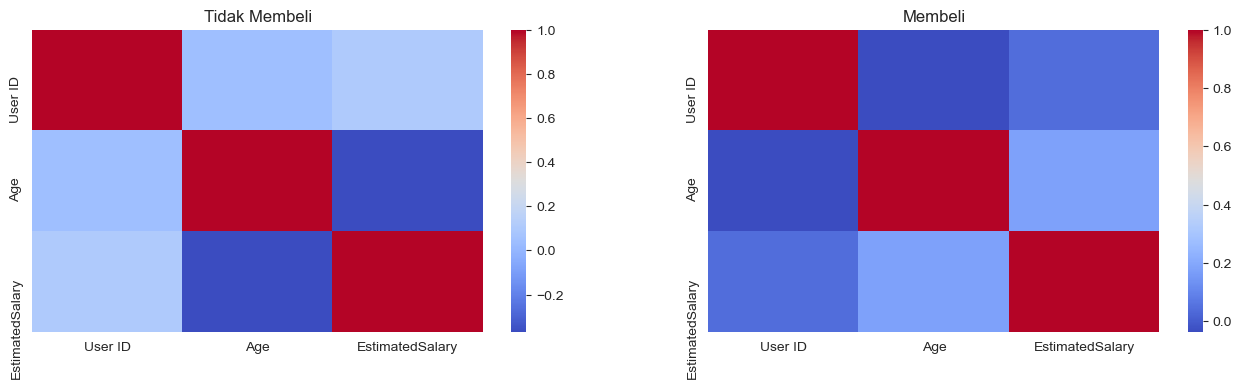

In [10]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df[df['Purchased']==1][['User ID', 'Gender', 'Age', 'EstimatedSalary']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Tidak Membeli')
ax = sns.heatmap(df[df['Purchased']==0][['User ID', 'Gender', 'Age', 'EstimatedSalary']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Membeli')

In [11]:
# Memisahkan dataset menjadi Data Training dan Data Test

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

In [12]:
# Feature Scaling / Standardisasi dengan Metode Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [13]:
# Menentukan Klasifikasi pada Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [14]:
# Memprediksi Hasil dari Data Test

Y_Pred = classifier.predict(X_Test)

In [15]:
# Membuat Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[116,   7],
       [ 32,  45]], dtype=int64)

In [16]:
# Akurasi dari SVM

from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86       123
           1       0.87      0.58      0.70        77

    accuracy                           0.81       200
   macro avg       0.82      0.76      0.78       200
weighted avg       0.82      0.81      0.80       200



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


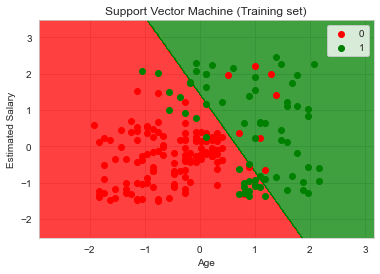

In [17]:
# Visualisasi Hasil Data Training

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


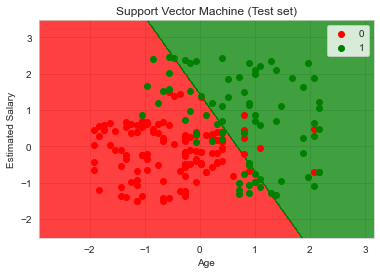

In [18]:
# Visualisasi Hasil Data Prediksi

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [19]:
#Pemilihan Parameter Model dengan GridSearch

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','polynomial','sigmoid']} 

In [20]:
from sklearn.model_selection import GridSearchCV

Salah satu hal menarik tentang GridSearchCV adalah peranannya sebagai meta-classifier. GridSearchCV akan mengambil model yang dipakai sebagai classifier, misalnya SVM, dan membuat classifier baru, yang berperilaku persis sama - dalam hal ini, seperti classifier kita sebelumnya. 

Kita bisa juga menambahkan parameter refit=True dan memilih verbose ke nomor mana pun yang kita inginkan, semakin tinggi angkanya, semakin verbose (verbose maksudnya adalah menampilkan output teks yang menjelaskan proses).

In [21]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

GridSearchCV akan menjalankan perulangan yang sama dengan teknik cross validation untuk menemukan kombinasi parameter terbaik. Setelah memiliki kombinasi terbaik, lalu dilakukan running pada semua data latih untuk membangun satu model baru menggunakan pengaturan kombinasi parameter terbaik.

In [22]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_Train,Y_Train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\WORK\anaconda\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\WORK\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The s

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'polynomial', 'sigmoid']},
             verbose=1)

**Kita bisa memeriksa kombinasi parameter terbaik yang ditemukan oleh GridSearchCV di best\_params\_ attribute, dan model klasifikasi terbaik di best\_estimator\_ attribute**

In [23]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [24]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

**Kemudian kita bisa melakukan prediksi lagi pada objek seperti yang kita lakukan dengan model normal**

In [25]:
grid_predictions = grid.predict(X_Test)

**Kita tampilkan Confusion Matrix untuk melihat perbaikan pada model**

In [26]:
print(confusion_matrix(Y_Test,grid_predictions))

[[112  11]
 [ 14  63]]


**Pemeriksaan Accuracy, Precision, Recall, dan F1-Score**

In [27]:
print(classification_report(Y_Test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       123
           1       0.85      0.82      0.83        77

    accuracy                           0.88       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.87      0.88      0.87       200



**Luar biasa, dari awalnya hanya akurasi 54%, dengan kombinasi parameter terbaik, kita bisa memaksimalkan model SVM menjadi 94% akurasi pada klasifikasi breast cancer**
